In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [ ]:
class Knn:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean(x, x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_idices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_idices]

        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.sum(y_pred == y) / len(y)


In [ ]:
# Define a class for performing K-Fold cross-validation
class KFold:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits

    def split(self, X, y):
        # Get the number of samples in the dataset
        n_samples = len(X)

        # Create an array of indices and shuffle them
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        # Split the dataset into train and test sets based on the number of splits
        for i in range(self.n_splits):
            start = i * n_samples // self.n_splits
            end = (i + 1) * n_samples // self.n_splits
            test_indices = indices[start:end]
            train_indices = np.concatenate((indices[:start], indices[end:]))
            yield train_indices, test_indices


    def score(self, X, y, model: Knn):
        scores = []

        # Iterate over the train and test sets generated by the split method
        for train_indices, test_indices in self.split(X, y):
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            # Fit the model on the train set and calculate the score on the test set
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))

        # Return the mean score across all splits
        return np.mean(scores)

In [ ]:
# Define a class for performing Leave-P-Out cross-validation
class LeavePOut:
    def __init__(self, p=1):
        self.p = p

    def split(self, X, y):
        # Get the number of samples in the dataset
        n_samples = len(X)

        # Create an array of indices and shuffle them
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        # Split the dataset into train and test sets based on the value of p
        for i in range(n_samples // self.p):
            start = i * self.p
            end = (i + 1) * self.p
            test_indices = indices[start:end]
            train_indices = np.concatenate((indices[:start], indices[end:]))
            yield train_indices, test_indices


    def score(self, X, y, model: Knn):
        scores = []

        # Iterate over the train and test sets generated by the split method
        for train_indices, test_indices in self.split(X, y):
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            # Fit the model on the train set and calculate the score on the test set
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))

        # Return the mean score across all splits
        return np.mean(scores)

Text(0, 0.5, 'sepal width')

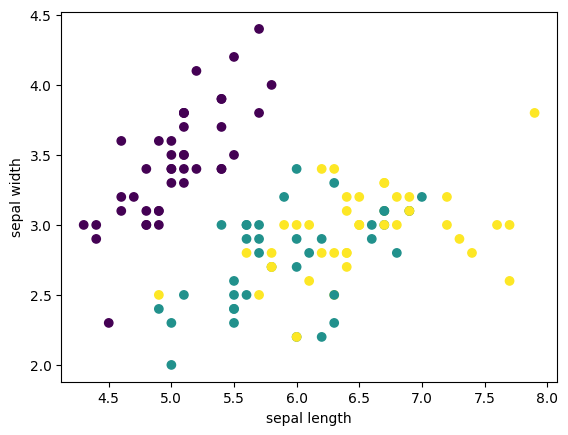

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
1.0


Text(0, 0.5, 'sepal width')

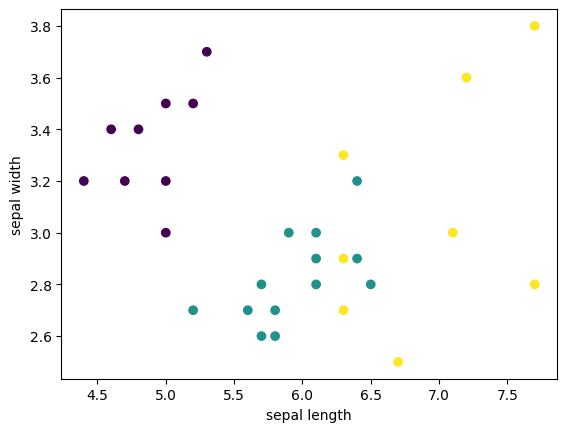

In [ ]:
clf = Knn(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

acc = clf.score(X_test, y_test)
print(acc)

plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

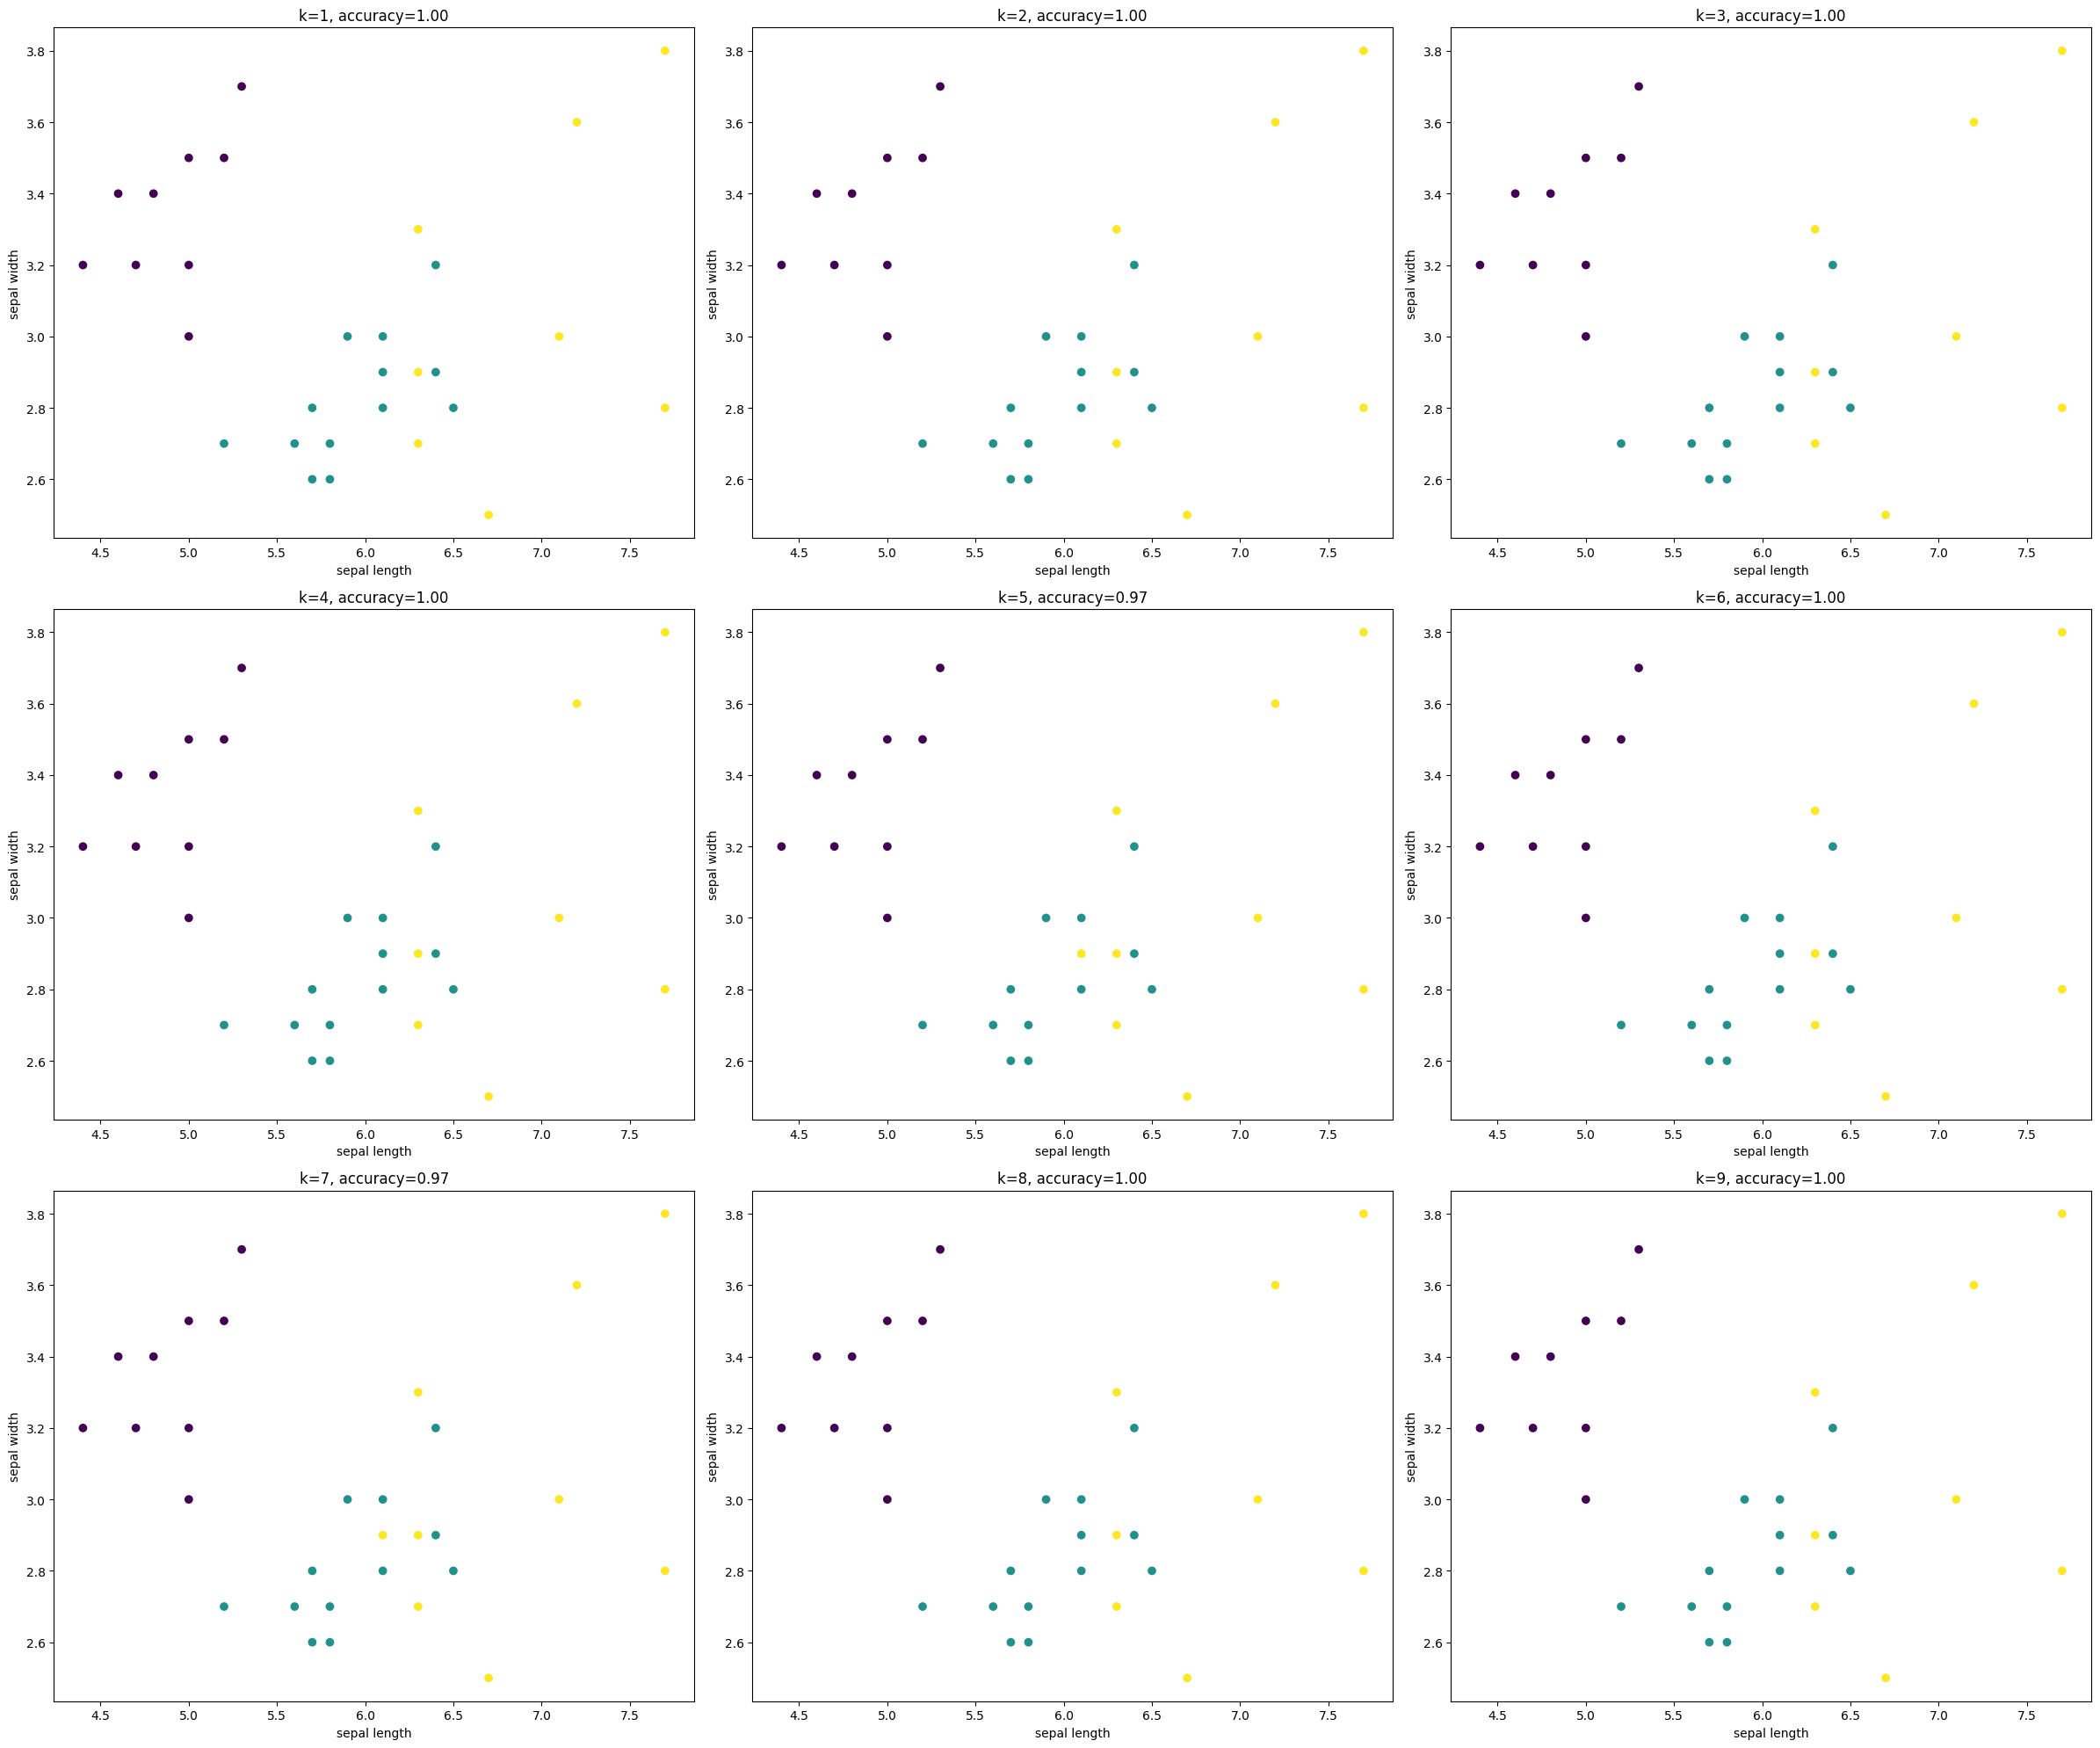

In [ ]:
# try for different values of k
plt.figure(figsize=(24, 20))
for k in range(1, 10):
    clf = Knn(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = clf.score(X_test, y_test)

    plt.subplot(3, 3, k)
    plt.title(f'k={k}, accuracy={acc:.2f}')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.tight_layout()

plt.show()


Text(0, 0.5, 'sepal width')

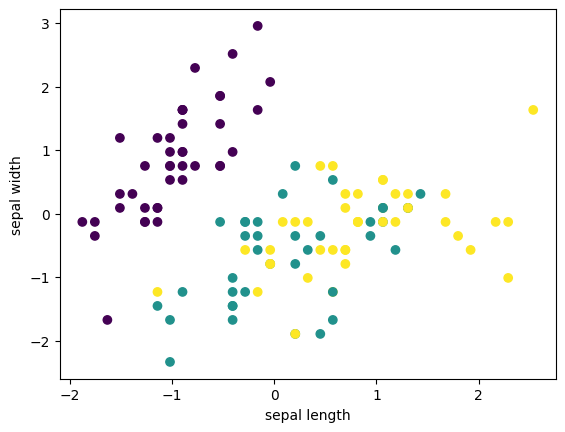

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'component 2')

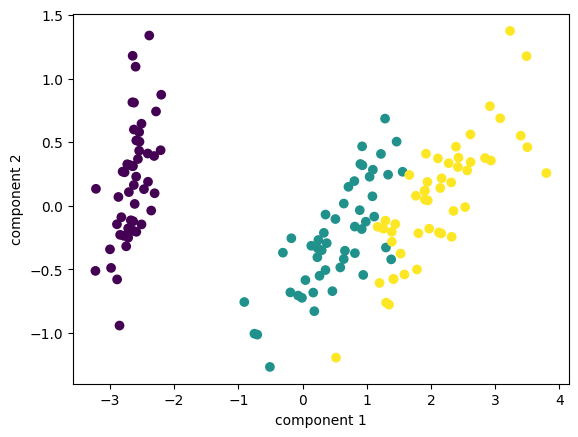

In [ ]:
# apply pca to reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')

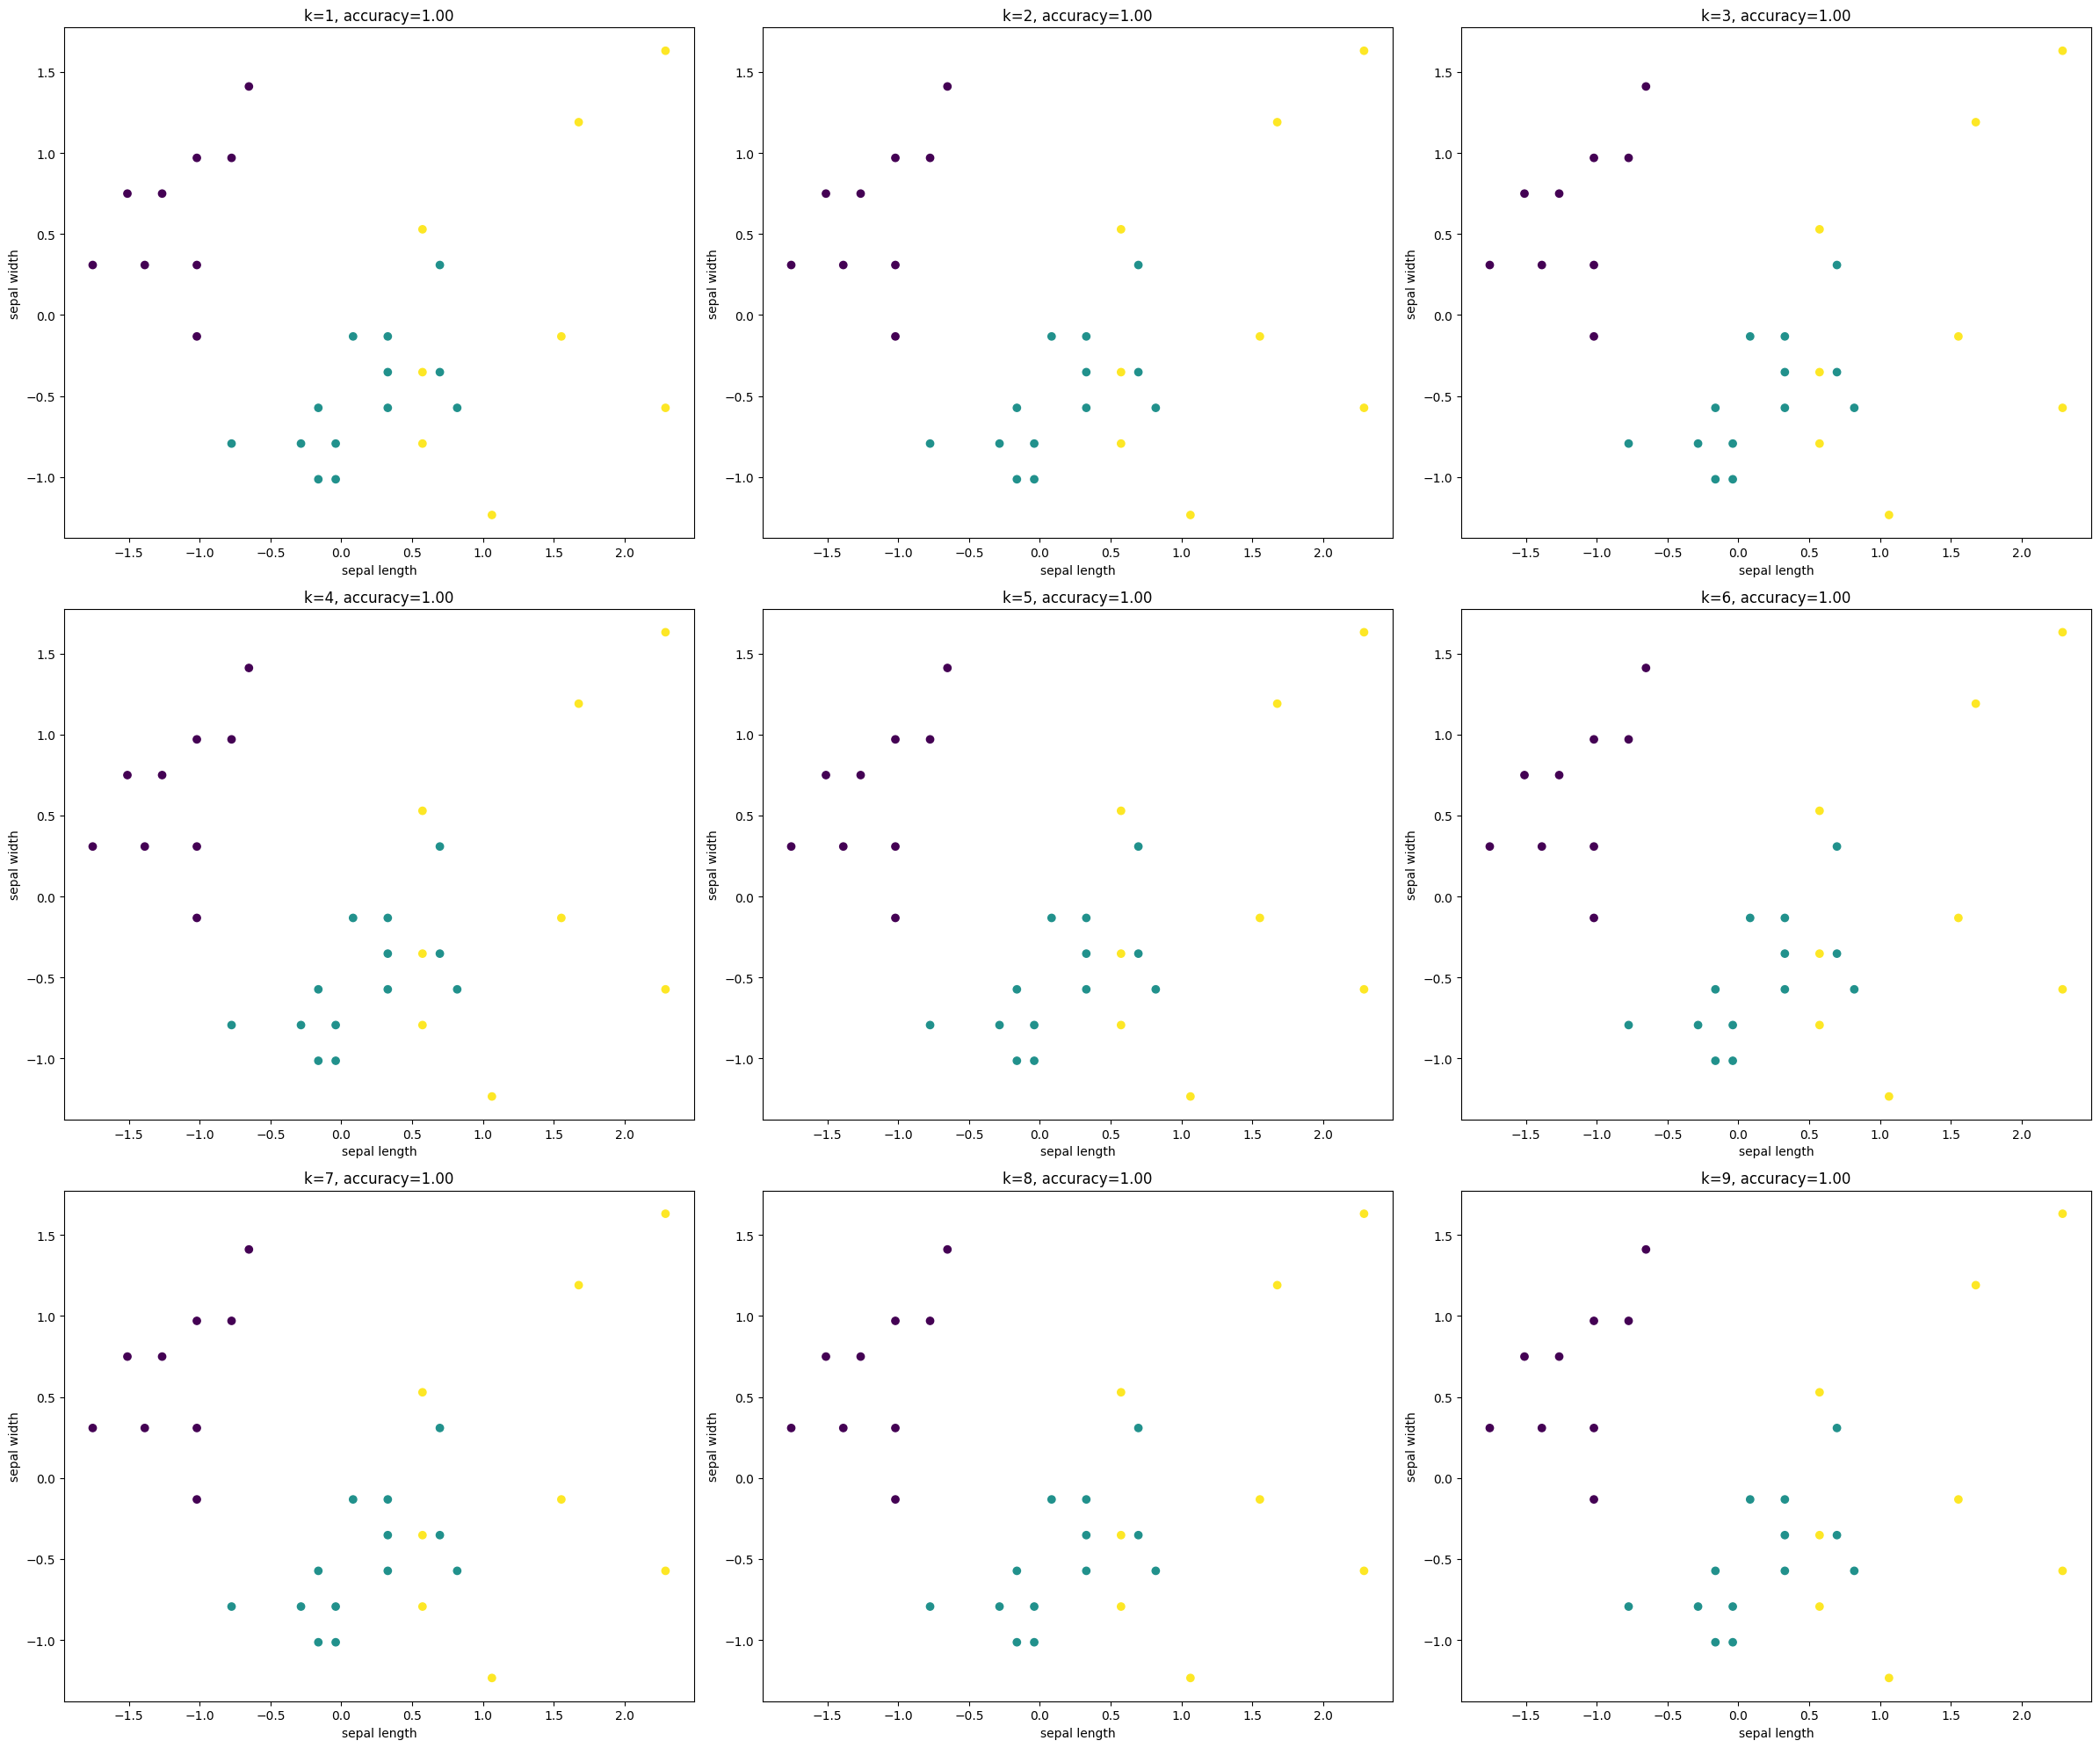

In [ ]:
# try for different values of k
plt.figure(figsize=(24, 20))
for k in range(1, 10):
    clf = Knn(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = clf.score(X_test, y_test)

    plt.subplot(3, 3, k)
    plt.title(f'k={k}, accuracy={acc:.2f}')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.tight_layout()

In [ ]:
# split the data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=.2, random_state=1234)

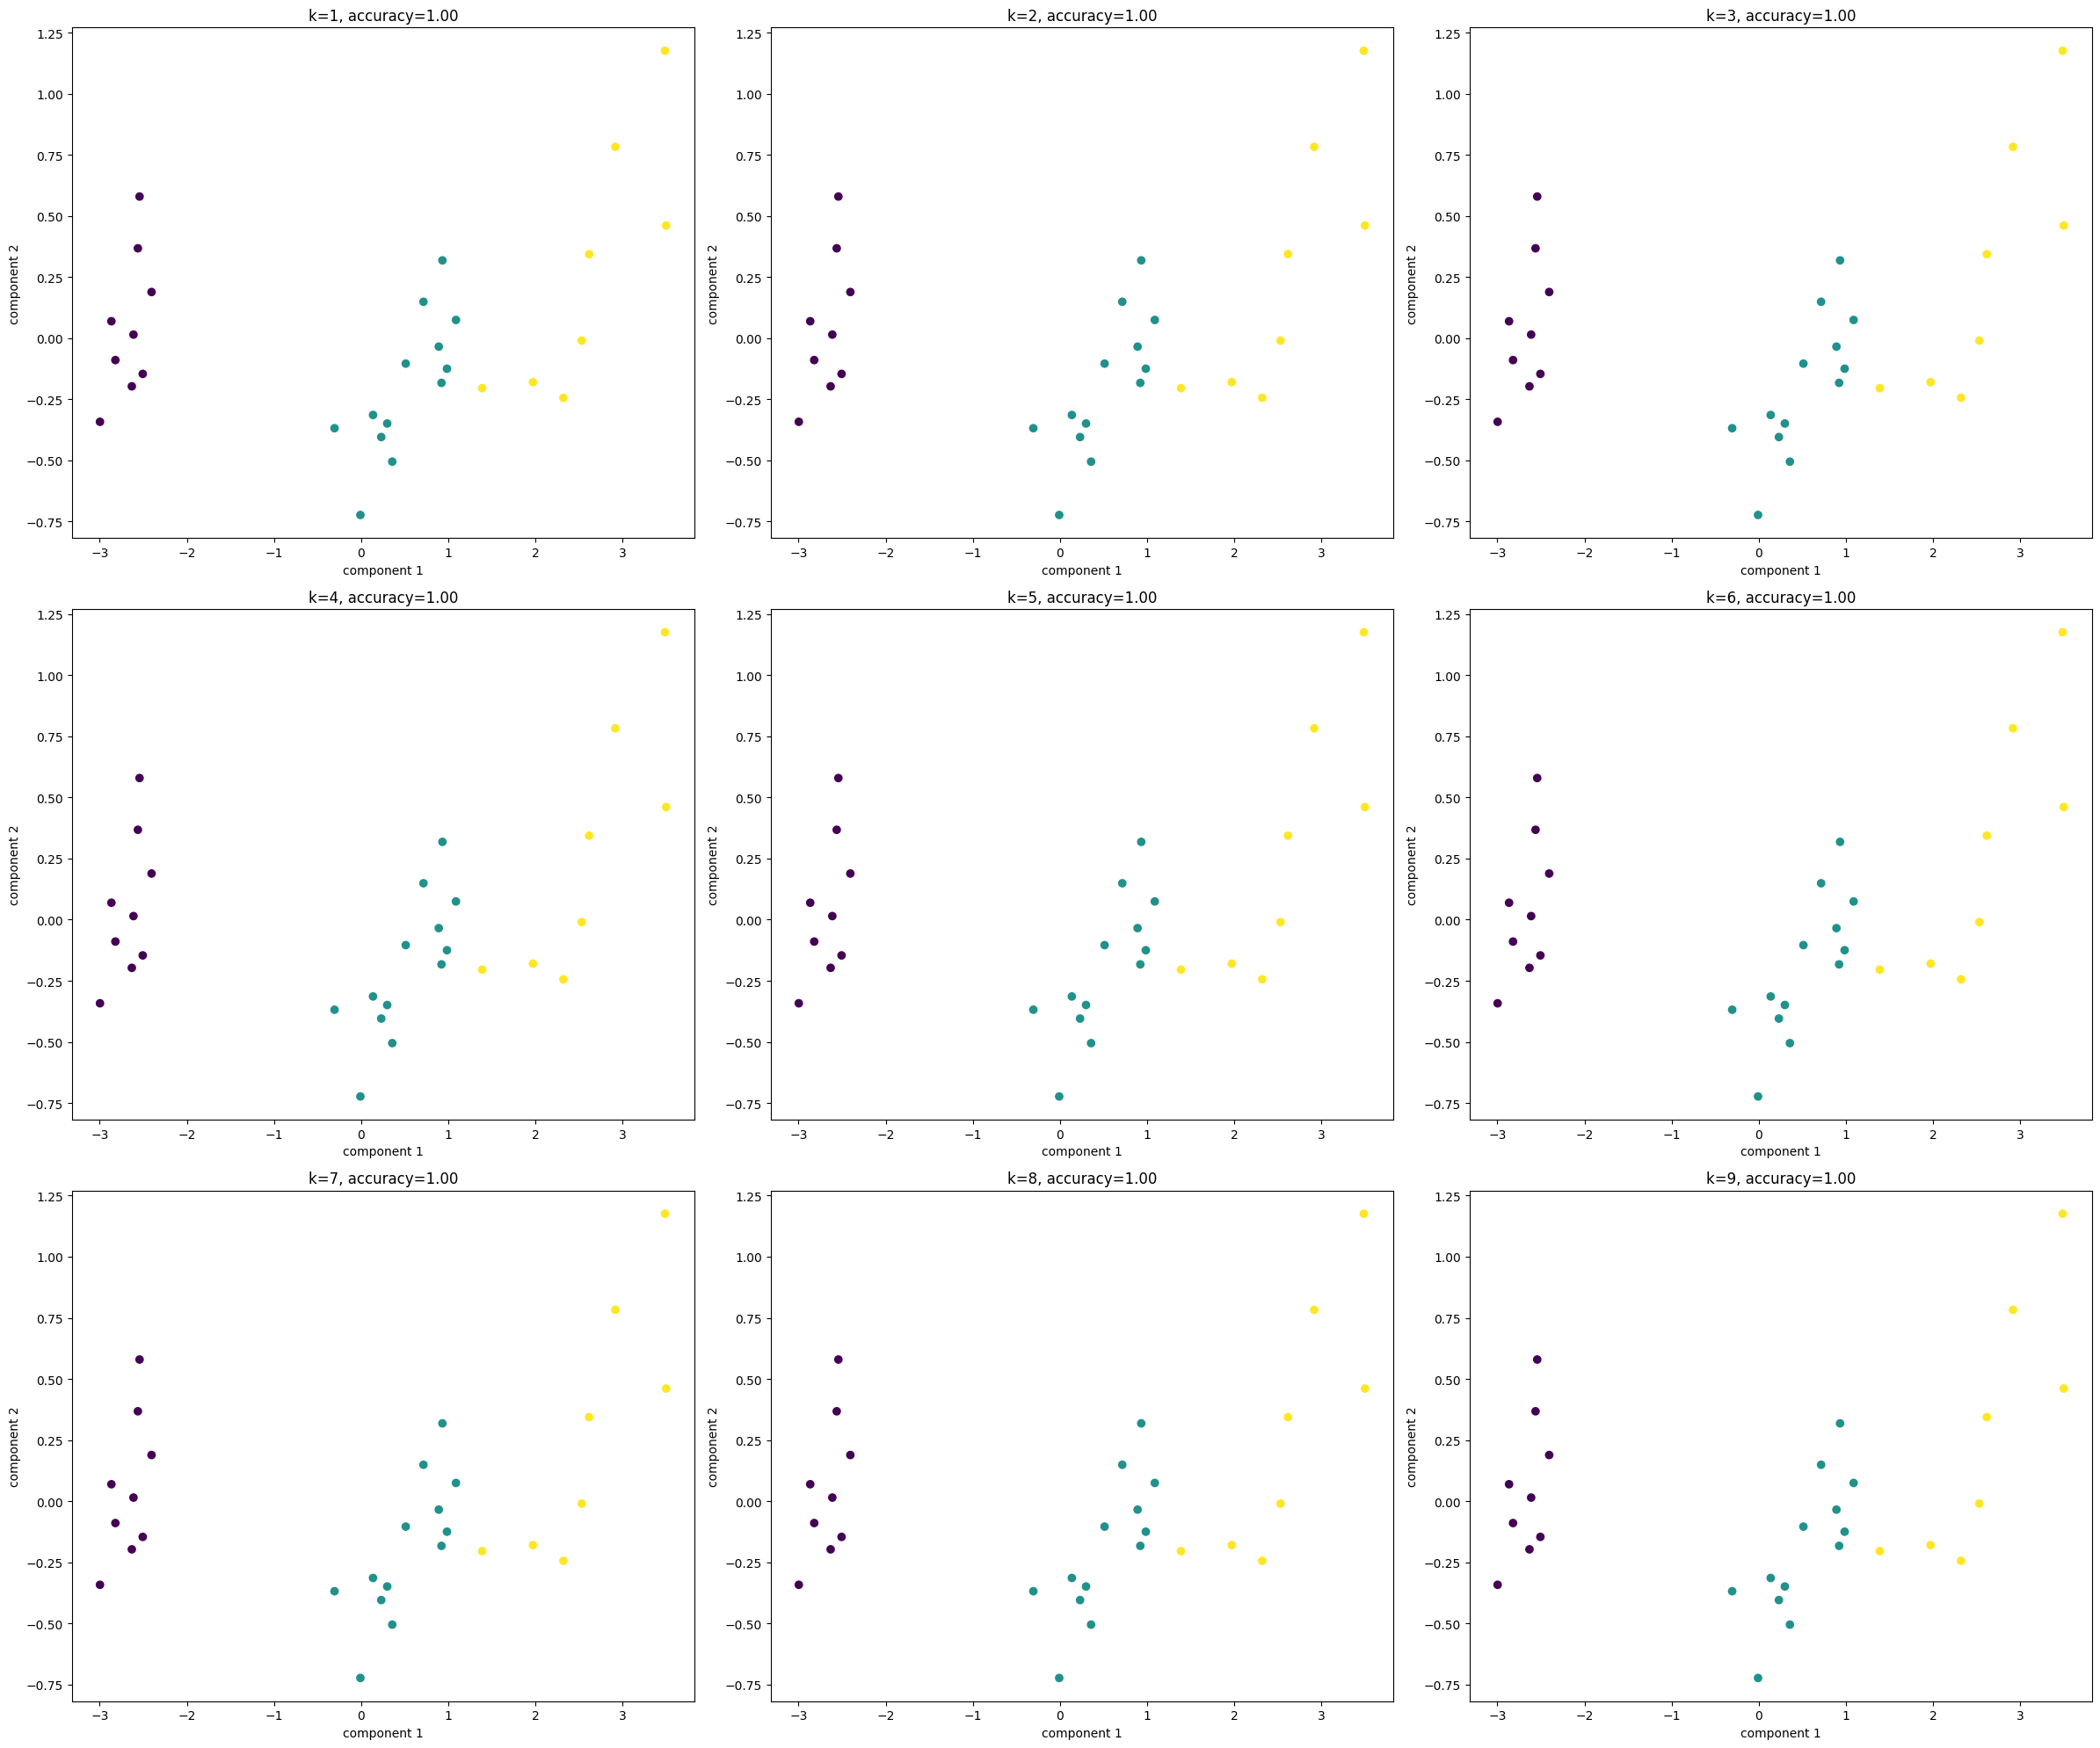

In [ ]:
# try for different values of k
plt.figure(figsize=(24, 20))
for k in range(1, 10):
    clf = Knn(k=k)
    clf.fit(X_train_pca, y_train_pca)
    predictions = clf.predict(X_test_pca)
    acc = clf.score(X_test_pca, y_test_pca)

    plt.subplot(3, 3, k)
    plt.title(f'k={k}, accuracy={acc:.2f}')
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=predictions, cmap='viridis')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.tight_layout()

Text(0, 0.5, 'component 2')

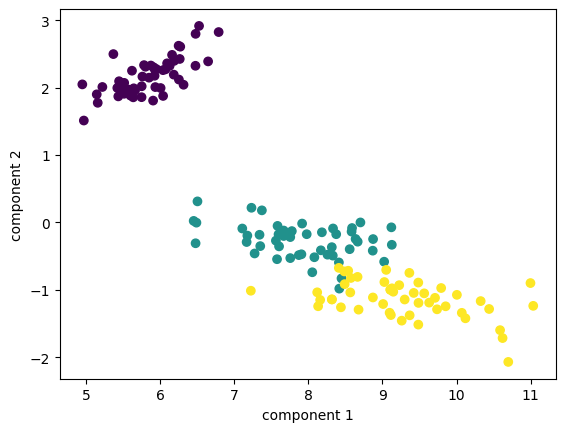

In [ ]:
# apply svd to reduce the dimensionality of the data
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')

In [ ]:
# split the data into train and test sets
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, y, test_size=.2, random_state=1234)

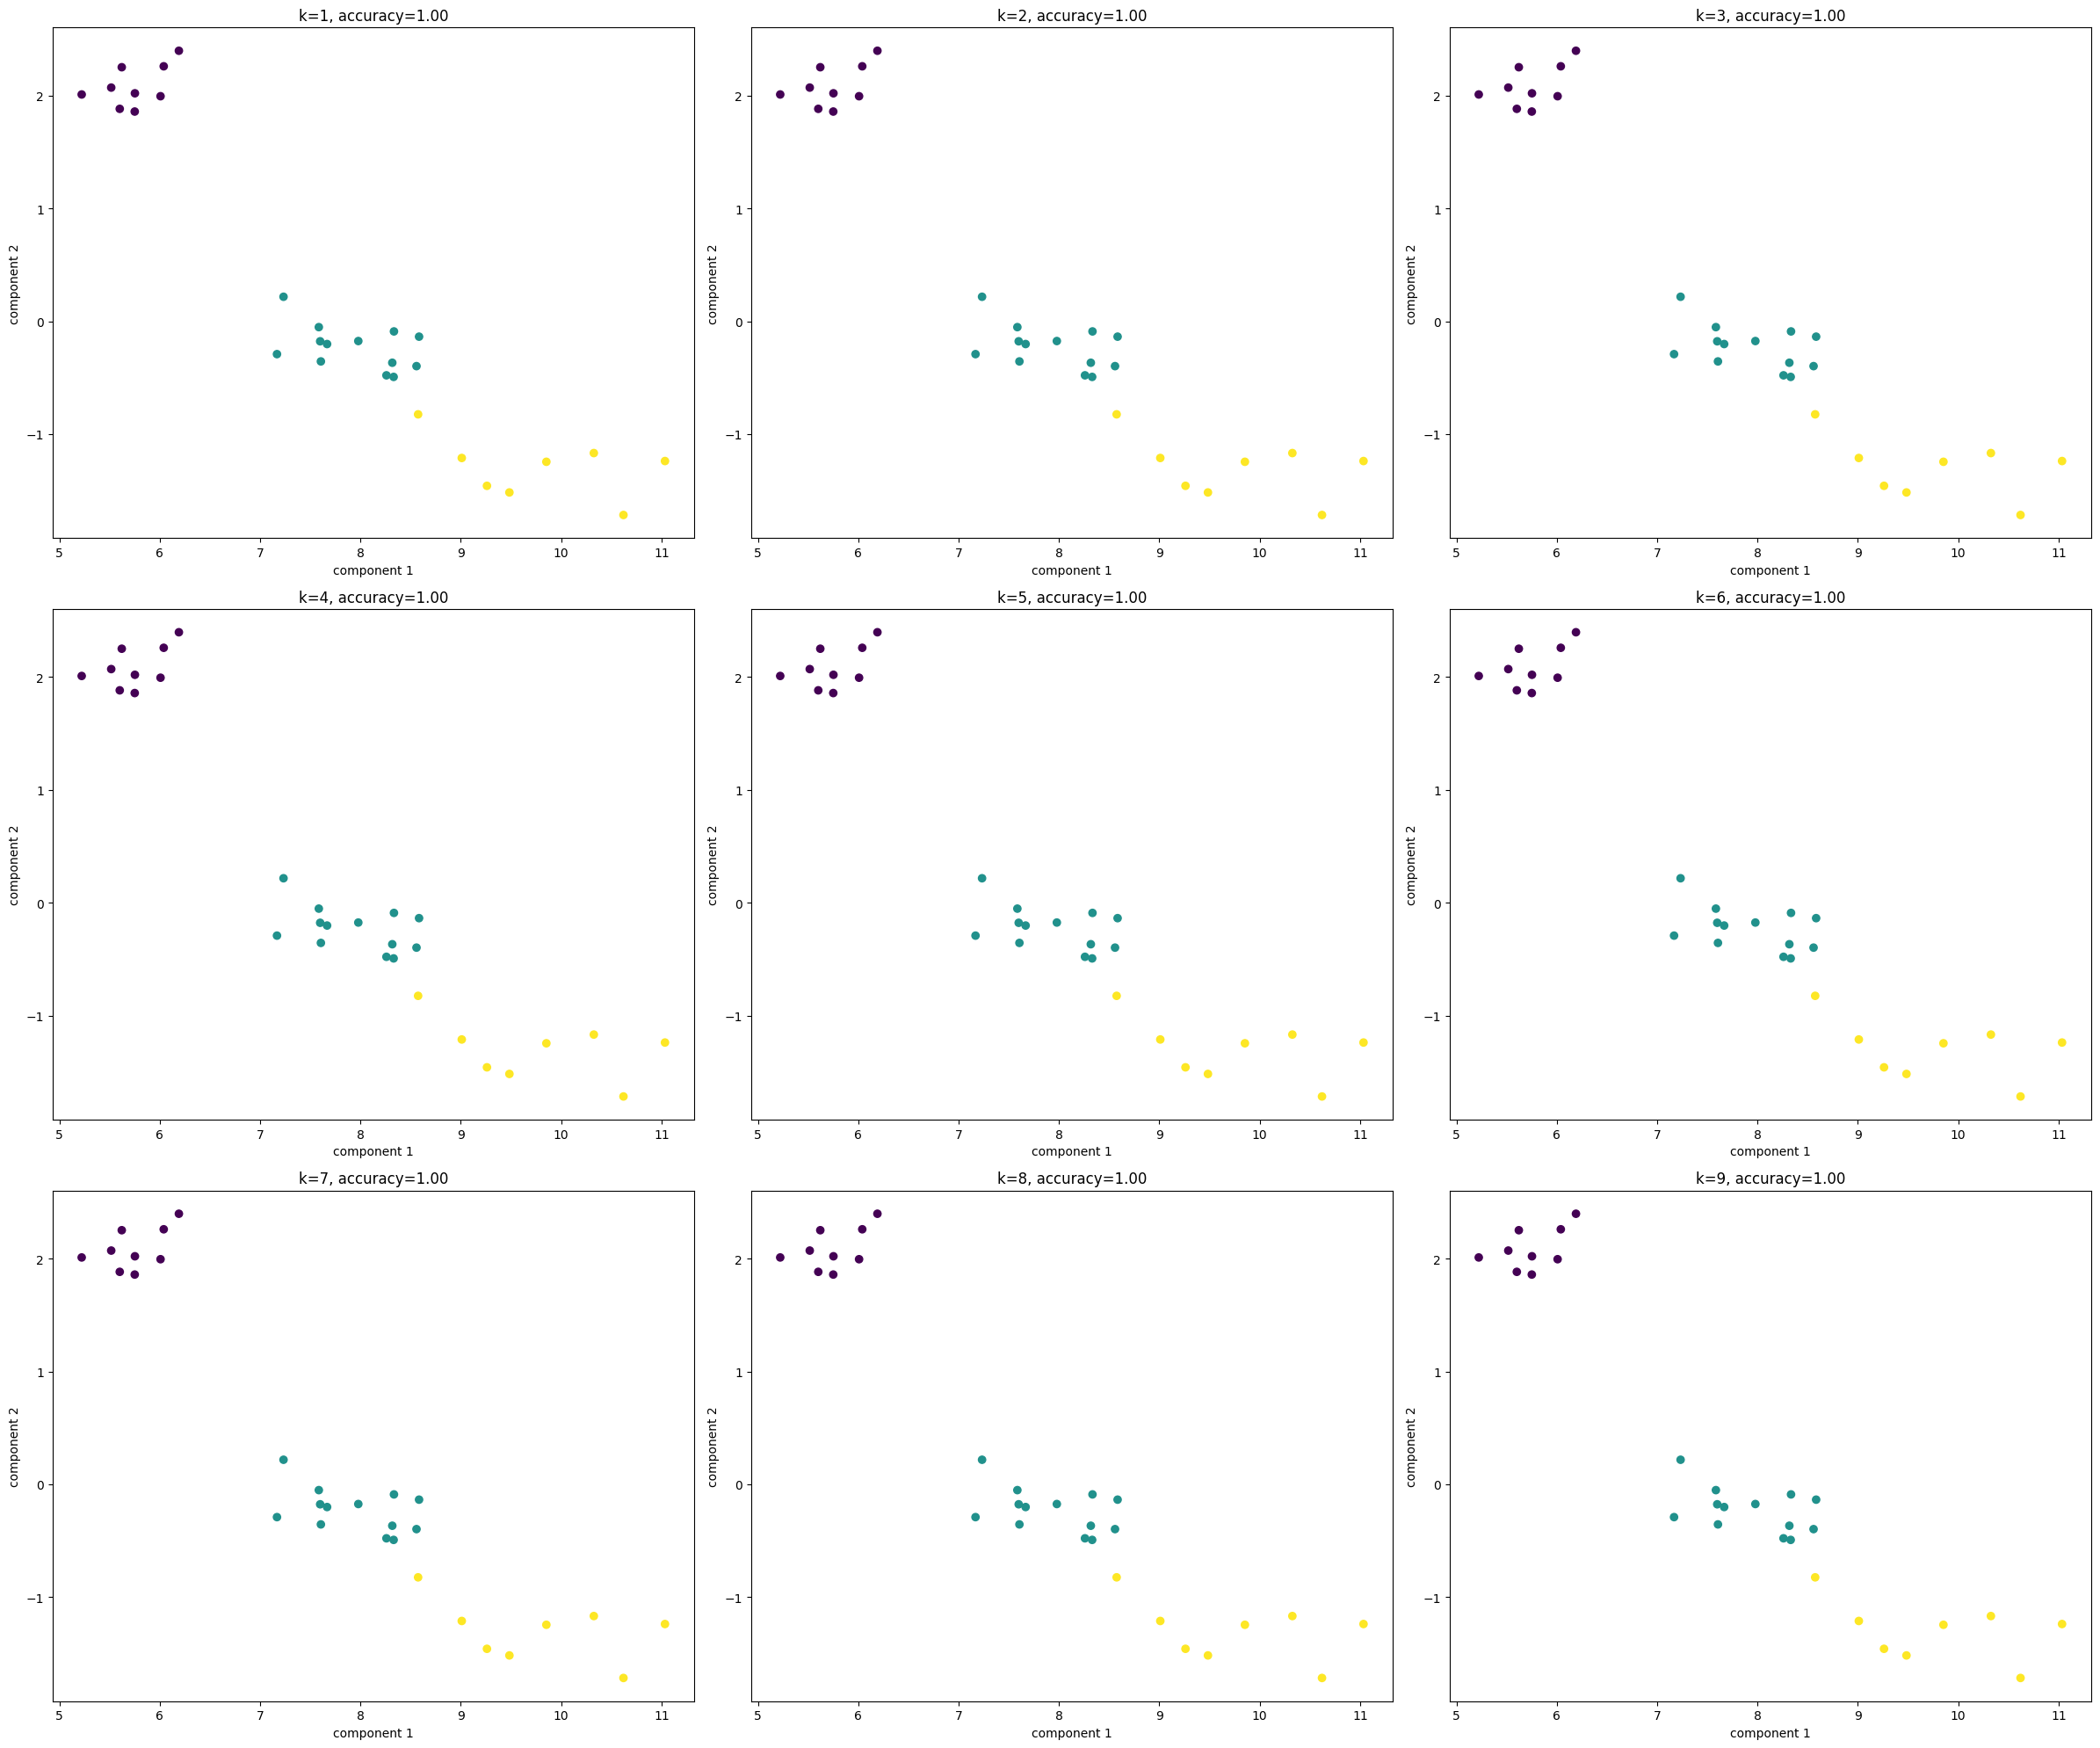

In [ ]:
# try for different values of k
plt.figure(figsize=(24, 20))
for k in range(1, 10):
    clf = Knn(k=k)
    clf.fit(X_train_svd, y_train_svd)
    predictions = clf.predict(X_test_svd)
    acc = clf.score(X_test_svd, y_test_svd)

    plt.subplot(3, 3, k)
    plt.title(f'k={k}, accuracy={acc:.2f}')
    plt.scatter(X_test_svd[:, 0], X_test_svd[:, 1], c=predictions, cmap='viridis')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.tight_layout()

plt.show()

In [ ]:
# apply KFold cross validation with different values of folds on the original data, pca and svd
for n_splits in range(2, 10):
    kf = KFold(n_splits=n_splits)
    acc_ori = kf.score(X, y, clf)
    acc_pca = kf.score(X_pca, y, clf)
    acc_svd = kf.score(X_svd, y, clf)

    print(f'k={n_splits}, accuracy_original={acc_ori:.2f}, accuracy_pca={acc_pca:.2f}, accuracy_svd={acc_svd:.2f}')


k=2, accuracy_original=0.90, accuracy_pca=0.96, accuracy_svd=0.95
k=3, accuracy_original=0.96, accuracy_pca=0.96, accuracy_svd=0.95
k=4, accuracy_original=0.94, accuracy_pca=0.96, accuracy_svd=0.95
k=5, accuracy_original=0.97, accuracy_pca=0.95, accuracy_svd=0.97
k=6, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
k=7, accuracy_original=0.98, accuracy_pca=0.97, accuracy_svd=0.97
k=8, accuracy_original=0.97, accuracy_pca=0.96, accuracy_svd=0.95
k=9, accuracy_original=0.97, accuracy_pca=0.95, accuracy_svd=0.97


In [ ]:
# apply LeavePOut cross validation with different values of p on the original data, pca and svd
for p in range(1, 10):
    lpo = LeavePOut(p=p)
    acc_ori = lpo.score(X, y, clf)
    acc_pca = lpo.score(X_pca, y, clf)
    acc_svd = lpo.score(X_svd, y, clf)

    print(f'p={p}, accuracy_original={acc_ori:.2f}, accuracy_pca={acc_pca:.2f}, accuracy_svd={acc_svd:.2f}')

p=1, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=2, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=3, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=4, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=5, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=6, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=7, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=8, accuracy_original=0.97, accuracy_pca=0.97, accuracy_svd=0.97
p=9, accuracy_original=0.95, accuracy_pca=0.97, accuracy_svd=0.97
